# Machine Learning

In [1]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

# A word on what machines can (and cannot) do

The term *Artifical Inteligence* was coined by John McArthy for the 1956 Dartmouth Conference. 

The idea of a *mechanical brain* is much older. 

<img width="45%" src="https://upload.wikimedia.org/wikipedia/commons/8/8b/Tuerkischer_schachspieler_windisch4.jpg" />   


The Church-Turing Thesis

> Every effectively calculable function is a computable function.

Using Turings definitions of computability

> "We shall use the expression 'computable function' to mean a function calculable by a machine, and let 'effectively calculable' refer to the intuitive idea without particular identification with any one of these definitions."

To put it into somewhat more understandable words:

* If something is intuitivly calculable (in whatever manner you can think of), it can be computed by a machine. 

* If something can be computed by a machine, it can be computed by a brain. (given enough time)



<div class="bottom">
  <div style="float: left; width: 70%; padding-right:5em;">
  
  __Are computers just as good as human brains then?__


<p>They seem to work well together.</p>

<p>Computer assisted proof of the Four-Color-Problem in 1989: </p>

<blockquote>  ...part of the proof was verified in over 400 pages of microfiche, which had to be checked by hand with the assistance of Haken's daughter... </blockquote>


Easy problem for machines:
<ul>
<li>  Is the text in the image written in the english language?</li>
</ul>
Impossible problem for machines:
<ul>
<li> What does this text mean?</li>
</ul>

A few things to keep in mind while talking about artifical intelligence
<ul>
    <li> 
    Logical reasoning (within some limitations) is possible for machines as long as all relations and symbols are strictly defined 
    </li>
    <li> 
    Mapping syntax and symbols to semantics and objects in the real world is something inherently human (or intelligent).
    </li>
    <li> 
    There is not really a powerfull formal equivalent for human creativity.
    </li>
    <li> 
    Machines cannot "learn"
    </li>
</ul>

  </div>
  <div style="float: left; width: 30%;">
      <img width="100%" src="./ml/images/alice.jpg"/>
  </div>
</div>


<p><br><br><br><br><br><br><br><br><br><br></p>

# Machine Learning (Supervised)

## Mathematical Notation and Problem Description

*For more details see "Elements of statistical Learning" by Trevor Hastie. (Available for free as an E-Book)* 

I'll try to follow some naming conventions along this notebook. They are the same as in the book (for the most parts).

* Uppercase letters such as $X$ or $Y$ denote generic aspects of a variable (i.e. the actual random variable)
* Observed values are written in lowercase. The ith observed value of $X$ is written as $x_i$
* Matrices are written in bold uppercase letters as in $\mathbf{X}$
* Observations map as *rows* in the matrix while the observed variables are the *columns*.

So if I measure two observables $p = 2$ the size and weight of $N = 100$ people, I get a $N \times p$ matrix $\mathbf{X}$.
One observation in that matrix is denoted as $x_i = [ size, weight ]$ while all observations of the variable size are denoted by $\mathbf{x}_j$ 

Heres one possible definition of supervised machine learning:

> Given a $N \times p$ matrix $\mathbf{X}$ and some associated output vector $\mathbf{Y} \in \mathbb{R}^N$,
 find a function $f(X) = \hat{Y}$ that takes a vector $X \in \mathbb{R}^p$ and returns a prediction for $\hat{Y}$
 where some "loss function" $L(Y, f(X))$ is minimized for all $X$.
 


#### The Titanic Example. Learning from disaster.

In the spring of 1912 the R.M.S. Titanic embarked on a journey to cross the Atlantic ocean. Unfortunately it hit an iceberg on the night of April 14th and sank shortly afterwards.

The disaster caused widespread outrage over what was seen as lax safety regulations and reckles behavoiur by some. New maritime safety laws were put in place after the sinking that are still in place today.

What can _we_ learn from the Titanic just by looking at its passenger data?

Our data contains a list of name, gender, age and ticket price for each (known) passenger.  

![NYT headline about the Titanic](./ml/images/nyt_titanic.jpg)

In [2]:
%matplotlib inline
from ml import plots
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

discrete_cmap = LinearSegmentedColormap.from_list('discrete', colors = [(0.8, 0.2, 0.3), (0.98, 0.6, 0.02), (0.1, 0.8, 0.3), (0, 0.4, 0.8), ], N=4)

pd.options.display.max_rows = 10
plots.set_plot_style()
def read_titanic():
    data = pd.read_csv('./titanic_train.csv', index_col='PassengerId').dropna(subset=['Age'])
    data['Survived_Code'] = data.Survived
    data['Pclass_Code'] = data.Pclass
    data.Survived = pd.Categorical.from_codes(data.Survived, categories=['no', 'yes'])
    data.Pclass = pd.Categorical.from_codes(data.Pclass - 1, categories=['1st', '2nd', '3rd'])
    data.Sex = pd.Categorical(data.Sex)
    data['Sex_Code'] = data.Sex.cat.codes
    return data

data = read_titanic()
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived_Code,Pclass_Code,Sex_Code
PassengerId,,,,,,,,,,,,,,
1,no,3rd,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,3,1
2,yes,1st,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1,0
3,yes,3rd,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,3,0
4,yes,1st,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,1,0
5,no,3rd,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,no,3rd,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q,0,3,0
887,no,2nd,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,2,1
888,yes,1st,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,1,0


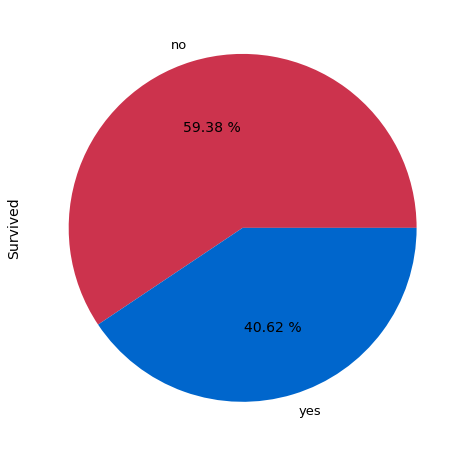

In [3]:
data.Survived.value_counts().plot.pie(autopct='%.2f %%', cmap=discrete_cmap)
plt.axes().set_aspect('equal')

__The task:__

Given a vector $X = (Name, Class, Age, Sex)$ can we find a function $f_{survival}(x) \in \{{yes, no}\}$ that accurately predicts the survival of the passengers in most cases?

How do we know if that function $f_{survival}(x)$  is any good?

To get some sense of the quality of this predictor we gather the following numbers.

* __True Positives__ $TP$, The number of correctly predicted events that belong to the 'positive' class
* __False Positives__ $FP$, The number of events falsely predicted as positive that actually belong to the 'negative' class
* __True Negatives__ $TN$, The number of correctly predicted events that belong to the 'negative' class
* __False Negatives__ $FN$, The number of events falsely predicted as negative that actually belong to the 'positive' class


We can look at the fraction of correctly labeled observations in the data

$$
    accuracy(\mathbf{y}, \mathbf{\hat{y}}) = \frac{1}{N} \sum_{i = 1}^N \mathbb{1}(y_i = \hat{y}_i)
$$

or simply put 

$$
    accuracy(\mathbf{y}, \mathbf{\hat{y}}) =  \frac{TP + TN}{ TP + FP + FN + TN} = \frac{\text{correclty predicted}}{\text{total number of observations}}.
$$


Now we try to find a function where the accuracy is higher than 0.5


__One possible solution__:

Women and children first?
 
```
def f_survival(passenger):
    if passenger.Sex == 'female':
        return 'yes'
    else:
        return 'no'
```


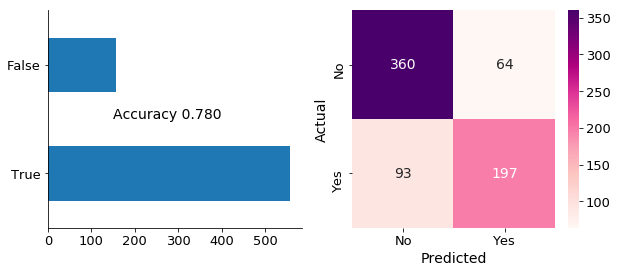

In [4]:
def f_sex(passenger_sex):
    return 'yes' if passenger_sex == 'female' else 'no'

data = read_titanic()
truth = data['Survived']
prediction = data['Sex'].apply(f_sex)

plots.plot_bars_and_confusion(truth=truth, prediction=prediction)

How can we improve the classification? 

We could try yo learn more about what happened on the Titanic. Essentially using *expert* knowledge.

Perhaps even by watching that 1997 movie where Leonardo Di Caprio drowns in the end. 

In the movie Di Caprios character dies along with many of his third class passenger friends.

<br/>
<br/>
<img width="50%" src="./ml/images/titanic-movie.jpg"/>
<br/>
<br/>


Let's presume rich people get to go into lifeboats.

```
def f_class(passenger):
    if passenger.class == '1st':
        return 'yes'
    else:
        return 'no'
```


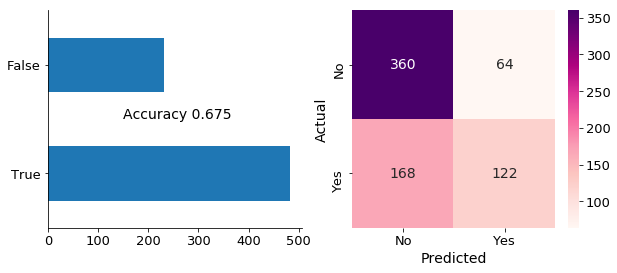

In [5]:
def f_class(passenger_class):
    return 'yes' if passenger_class == '1st' else 'no'

data = read_titanic()
prediction = data['Pclass'].apply(f_class)
truth = data['Survived']

plots.plot_bars_and_confusion(truth=truth, prediction=prediction)

## Linear Models

Can we improve our predictor by combining more variables into one predictor?

Lets presume a linear weighted combination of variables:

$$
f(x)= \hat{y} =  \hat{\beta}_0 + \sum_{j=1}^p x_j \hat{\beta}_j
$$
where $f:\mathbb{R}^{p} \to \mathbb{R}$.

For a single sample of the Titanic data we simply evaluate:
$$
f(x)= \hat{\beta}_0 + x_{Class} \hat{\beta}_1 + x_{Sex} \hat{\beta}_2
$$

When we include a 1 as the first entry into our sample $x$ e.g. $x = (1, x_1, x_2, \ldots, x_p)$ we can rewrite
$f$ in matrix form

$$
f(x)= \hat{y} =  x^T \mathbf{\beta}
$$

where $\beta = (1, \beta_1, \beta_2, \ldots, \beta_p)$.



How do you find those weights? Like before we choose a loss function and try to opimize it.
In this case we choose a loss function called the residual sum of squares (RSS).
We calculate it over all samples $x_i$ in a matrix $\mathbf{X}$.

$$L(\beta) = RSS(\mathbf{\beta}) = \sum_{i=1}^N (y_i - x_i^T \beta)^2 $$

Here $x_i$ is a row in $\mathbf{X}$, hence the transpose.

We can now rewrite the loss function in matrix form:


$$
RSS(\beta) = (\mathbf{y} - \mathbf{X} \beta)^T (\mathbf{y} - \mathbf{X} \beta )
$$

Now we optimize the loss function just like we would any other function, by differentiating with respect to $\beta$ and setting the result equals to zero.

$$
 \mathbf{X}^T (\mathbf{y} - \mathbf{X} \beta ) \stackrel{!}{=} 0
$$

Solving for $\beta$ leads to

$$
\hat{\beta} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}
$$


We just performed  __Linear Least Squares__ regression.

Now we can define a function to predict passenger survival according to

$$
\hat{y} = \begin{cases}
\text{Yes}, & \text{if $ f(x) \gt 0.5$} \\
\text{No}, & \text{if $ f(x) \le 0.5$}
\end{cases}
$$ 



##### Linear Regression and Classification with sklearn

Create an artificial 2D dataset with two classes and use the least squares method to seperate them.


1. Create random points in a 2D parameter space
        
        from sklearn.datasets import make_blobs
        
2. Use scikit-learn's linear regressor to find the parameters for $f(X_1, X_2) = \hat{Y}$.

        from sklearn import linear_model
        reg = linear_model.LinearRegression()
        reg.fit(X, Y)
        b_1, b_2 = reg.coef_
        b_0 = reg.intercept_

3. Draw a dashed line into the plot where $f(X_1, X_2) = 0.5$.

        x1s = np.linspace(-2, 2)
        x2s = ...

        plt.plot(x1s, x2s, color='gray', linestyle='--')

/usr/local/lib/python3.6/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


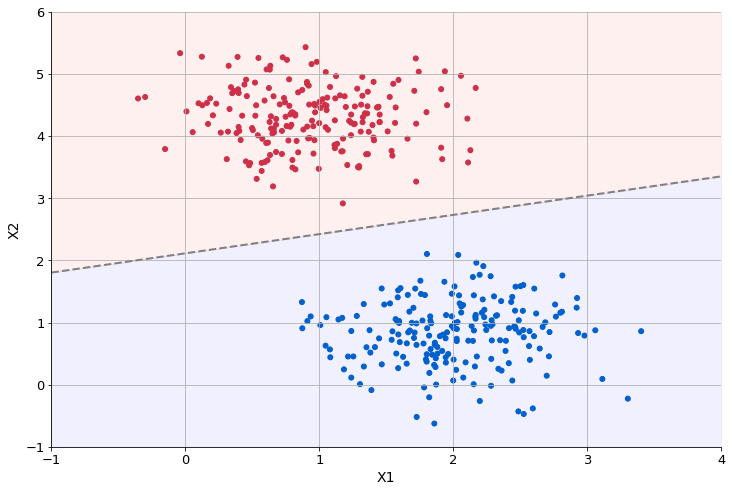

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=400, centers=2, cluster_std=0.5, random_state=0)

# train the linear regressor and save the coefficents
reg = linear_model.LinearRegression()
reg.fit(X, y)
b_1, b_2 = reg.coef_
b_0 = reg.intercept_

# solve the function y = b_0 + b_1*X_1 + b_2 * X_2 for X2
x1s = np.linspace(-1, 4)
x2s = (0.5 - b_0 - b_1 * x1s) / b_2


plt.scatter(X[:, 0], X[:, 1], s=25, c=y, cmap=discrete_cmap)


plt.plot(x1s, x2s, color='gray', linestyle='--')

plt.fill_between(x1s, x2s, 6, color='red', alpha=0.06)
plt.fill_between(x1s, x2s, -1, color='blue', alpha=0.06)

plt.grid()
plt.xlabel('X1')
plt.ylabel('X2')
plt.margins(x=0, y=0)
None


We just *learned* the parameters for a statistical model based on labeled data.

Can a linear classification improve the classification of the Titanic dataset case?

We have to evaluate our 'learned' model independent test set

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

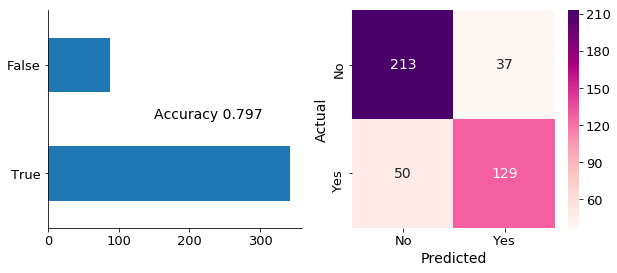

In [7]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

X = data[['Sex_Code', 'Pclass_Code', 'Fare', 'Age']]
y = data['Survived_Code']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=0)

reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
y_prediction = reg.predict(X_test)
y_prediction = np.where(y_prediction > 0.5, 1, 0)

plots.plot_bars_and_confusion(truth=y_test, prediction=y_prediction)

The model does not seem to improve the classification to a large degree. 


We will talk more about properly validating models later. 

[<matplotlib.text.Text at 0x10e8c4f98>, <matplotlib.text.Text at 0x10e8fff28>]

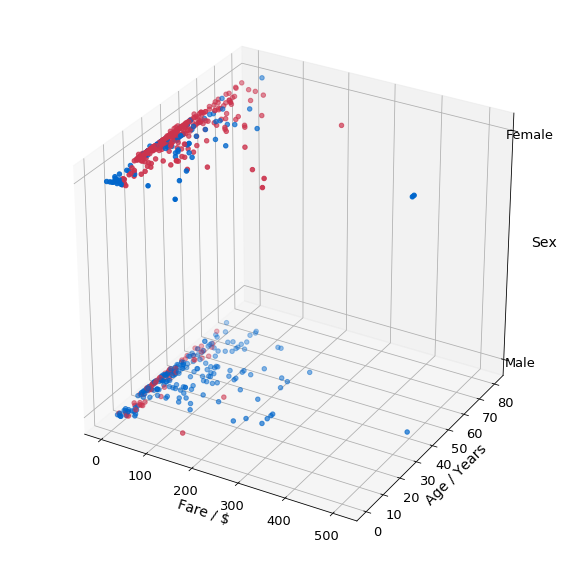

In [8]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data.Fare, data.Age, data.Sex_Code, c=data.Survived_Code, cmap=discrete_cmap)
ax.set_xlabel('Fare / $')
ax.set_ylabel('Age / Years')
ax.set_zlabel('Sex')
ax.set_zticks([0,1])
ax.set_zticklabels(['Male', 'Female'])

### Naive Bayes

Different classification algorithms optimize different loss functions. In the previous section we optimized the residual sum of squares. Now we will be looking at the __0-1 loss__.


$$ L_{0,1}(\hat{Y}, Y) = 1 - \delta(Y, \hat{Y}) =    \begin{cases}
                                                    1 & {\text{if}}\quad Y \neq \hat{Y} \\
                                                    0 & {\text{else}} 
                                                \end{cases}
$$

This loss is used for classification problems as it basically counts the number of misclassifications and works best on discrete values of $Y$.

One possible Idea is to try and minimize the 0-1 loss directly.

Presume we knew $P(Y| X)$ i.e the probability for the value of the label $Y$ in presence of a data point.
Then intuitively the best classifier $f(x) = \hat{y}$ is the one that minimizes the conditional expected loss.

\begin{align}
    E(L_{0,1}(\hat{y}, y) | x) =& \sum_{y \in Y}P(y| x) L_{0,1}(\hat{y}, y) \\
            =& \sum_{y \in Y}  P(y| x) (1 - \delta(\hat{y}, y)) \\
            =& \sum_{y \in Y}  P(y| x) - \sum_{y \in Y} \delta(\hat{y}, y)) P(y| x) \\
            =& 1 - \sum_{y \in Y} \delta(f(x), y)) P(y| x) \\
            =& 1 - P(\hat{y}| x) \\
\end{align}

Now if we minimze the expected loss given a sample $x$ while varying the predictor function $f(x) = \hat{y}$ we get   
<p style="color:gray"> See <a href="https://de.wikipedia.org/wiki/Arg_max" style="color:gray">https://de.wikipedia.org/wiki/Arg_max</a> </p>

\begin{align}
f_{*} =& \arg \min_f(E(L_{0,1}(f(x), y) | x)) = \arg \min_{\hat{y}}(E(L_{0,1}(\hat{y}, y) | x)) \\
    =& \arg \min_{\hat{y}} \left(  1 - P(\hat{y}| x) \right) \\
    =& \arg \max_{\hat{y}} \left( P(\hat{y}| x) \right) \\
\end{align}

This is a special case of the so called the maximum a posteriori principle (MAP https://de.wikipedia.org/wiki/Maximum_a_posteriori) which can be used to estimate the mode of the posterior distribution.


Keep in mind that $x$ is a vector of $p$ observables. 

$$
P(\hat{y} | x^{(1)}, \ldots, x^{(p)}) 
$$

Using Bayes' theorem (https://en.wikipedia.org/wiki/Bayes'_theorem) for conditional probabilities we get 


\begin{align}
f_{*} =& \arg \max_{\hat{y}}\left( P(\hat{y} |x^{(1)}, \ldots, x^{(p)})  \right) \\
 =& \arg \max_{\hat{y}}\left(\frac{P(\hat{y}) \cdot P(x^{(1)}, \ldots, x^{(p)} | \hat{y})} {P(x^{(1)}, \ldots, x^{(p)})} \right) \\
  =& \arg \max_{\hat{y}}\left(P(\hat{y}) \cdot P(x^{(1)}, \ldots, x^{(p)} | \hat{y}) \right) \\
\end{align}

The problem is that usually the a priori distributions (aka the prior) is unknown and has to be approximated using strong assumptions.

The __Naive Bayes__ classifier does exactly that. Let's assume that the features are completely independent of each other. In that case we can write 

$$
P(x^{(1)}, \ldots, x^{(p)} | \hat{y}) = \prod^{p}_{i=1} P(x^{(i)}| \hat{y})
$$



$$
f_{*} = \arg \max_{\hat{y}}\left( P(\hat{y}) \prod^{p}_{i=1} P(x^{(i)}| \hat{y})  \right)
$$


When $Y$ takes finite values (or classes) $Y = \{Y_1, \ldots Y_K\}$, like in the Titanic dataset, we get the decission function for the Naive Bayes classifier 

$$
y_{\text{Naive Bayes}} = \arg \max_{k \in {1, \ldots, K}}\left( P(Y_k) \prod^{p}_{i=1} P(x^{(i)}| Y_k)  \right)
$$


Note that the independency assumption is a very strong constraint. Features in real data are almost never independent of each other. __This assumption is almost always wrong__. (Hastie does call it the *idiots* classifier). 

Even under that assumption the probabilities $P(x^{(i)}| \hat{y})$ are often not known. They can however often be approximated.

In the Titanic dataset we simply assume uniform priors. That means $P(Y={\text{Survived}}) = \frac{\text{number of passengers that survived}}{\text{total number of passengers}}$.


For the feature distributions/likelihoods we assume a Gaussian distribution. For a feature $\mathbf{x_i}$, for example the age of a passenger, we assume a Gaussian distributions and empirically estimate both mean $\mu_k$ and standard deviation $\sigma_k$ of the samples of passengers in class $Y_k$. For a given value of an observable $v$, e.g. the age of a single passenger, we then compute 

$$
p(x=v \, | \, Y_k) = \mathcal{N}(\mu_k, \sigma_k)
$$


Below we perform Gaussian Naive Bayes on the Titanic dataset.

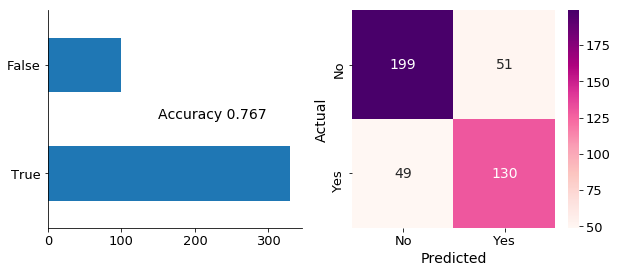

In [9]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

X = data[['Sex_Code', 'Pclass_Code', 'Fare', 'Age']]
y = data['Survived_Code']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=0)

reg = GaussianNB()
reg.fit(X_train, y_train)

plots.plot_bars_and_confusion(truth=y_test, prediction=reg.predict(X_test))


## Support Vector Machines (SVMs)

The basic assumption underlying the least squares approach is that the model is linear in the observed variables. 
This works for data which can be separated by a linear function (a hyperplane in the parameter space).

But how do we know that this method finds the 'best' hyperplane for separating the two classes?

And what if the data cannot be seperated by a plane?


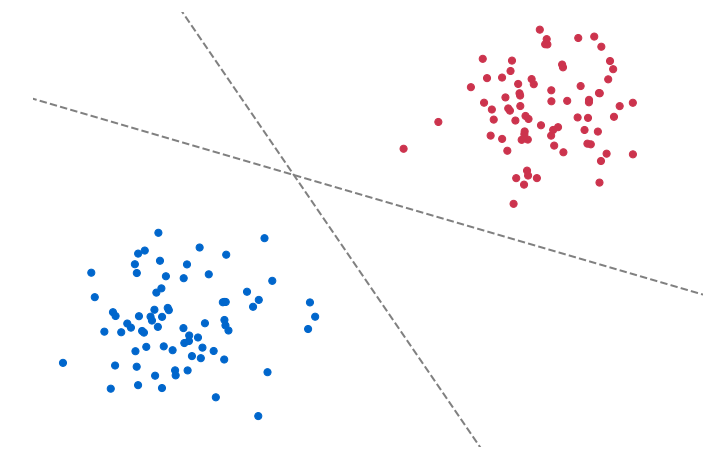

In [10]:
# many possible lines to separate the data. Which one is 'better'?
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=150, centers=2,
                  random_state=3, cluster_std=0.70)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=discrete_cmap)

xs = np.linspace(-6.5, 3, 2)
plt.plot(xs, -2 * xs - 2, color='gray', linestyle='--')
plt.plot(xs, -0.4 * xs + 2, color='gray', linestyle='--')
plt.xlim([-6, 3])
plt.ylim([-2, 6])
plt.axis('off')
None

#### The Support Vector Machine

Again we minimze a loss function.

$$
L(\beta) = C \max(0, 1 - y_i \beta^T x_i) + \frac{\lambda}{2}||{\beta}||^2
$$

Support Vector Machines try to find the hyperplane which maximimizes the margin to the points in different classes in the parameter space.

$C$ and $\lambda$ are two parameters which can be chosen beforehand. 

<p style="color:gray"> Note that, to fit the definition above, the label encoding has to be $y_i \in {-1, 1}$</p>

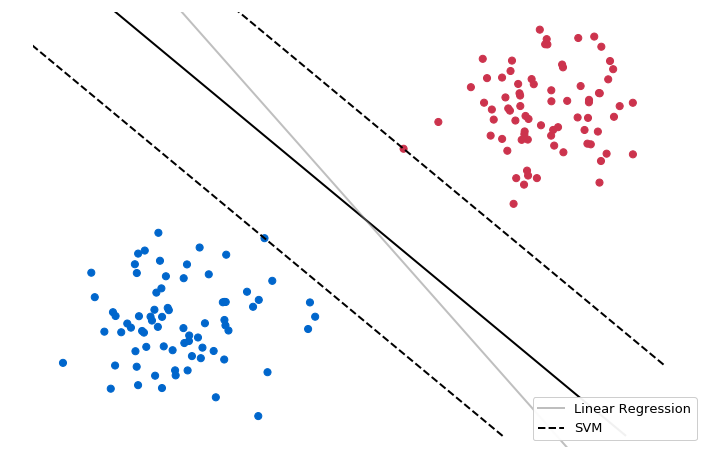

In [11]:
from sklearn.svm import SVC
from sklearn.datasets.samples_generator import make_blobs

X, y = make_blobs(n_samples=150, centers=2,
                  random_state=3, cluster_std=0.70)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=discrete_cmap)

clf = SVC(kernel='linear')
clf.fit(X, y)

plots.draw_svm_decission_function(clf, colors='black', label='SVM')

reg = linear_model.LinearRegression()
reg.fit(X, y)

plots.draw_linear_regression_function(reg, label='Linear Regression', color='gray', alpha=0.5)

plt.xlim([-6, 3])
plt.ylim([-2, 6])
plt.legend(loc='lower right', frameon=True, framealpha=0.95, facecolor='white')
None

So far the data has still been separable by a linear function. 

For many problems in real life however this isn't the case. 

Heres an example of (artificial) data which cannot be seperated by a line.

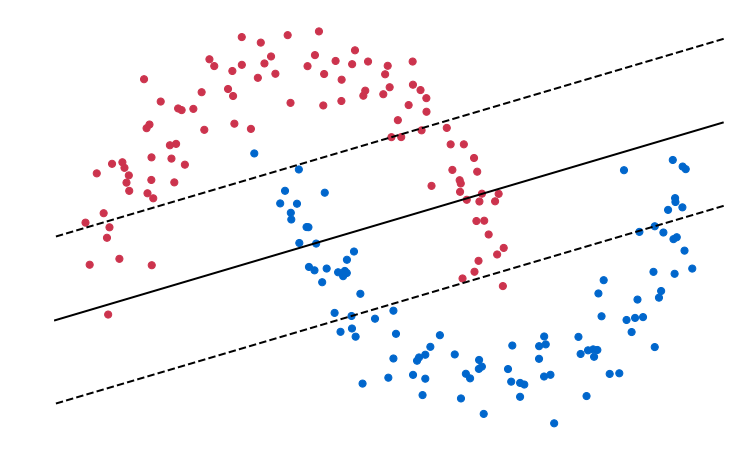

In [12]:
from sklearn.datasets.samples_generator import make_moons

X, y = make_moons(n_samples=200, noise=0.10, random_state=0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=discrete_cmap)

clf = SVC(kernel='linear')
clf.fit(X, y)
plots.draw_svm_decission_function(clf, colors='black')


Now what if we take that data and transform it into a new variable. 

Find a function $h$ to create a new variable $X_h = h(X_1, X_2, \ldots)$.

In the case above some radial symmetry seems be an underlying feature of the data. 

We can exploit that

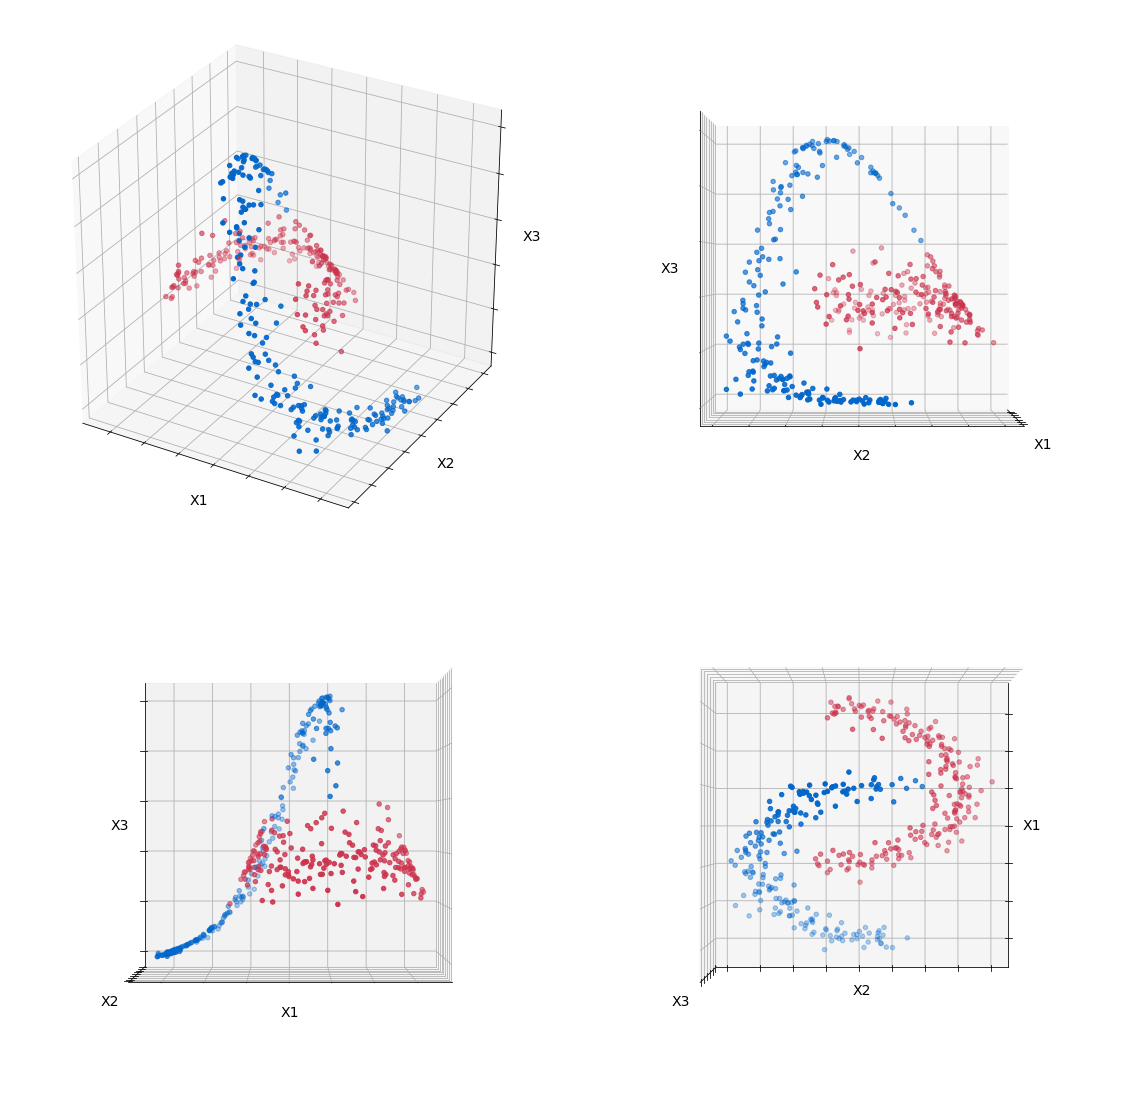

In [13]:
from mpl_toolkits import mplot3d
X, y = make_moons(n_samples=400, noise=0.10, random_state=0)
# add a dimension by applying a transformation on the two variables in the data. 
r = np.exp(-(X[:, 0] ** 2 + X[:, 1] ** 2))

#fig = plt.figure(figsize=(16, 6))
#ax = fig.add_subplot(1, 2, 1, projection='3d')

plots.plot_3d_views(np.c_[X,r], y)

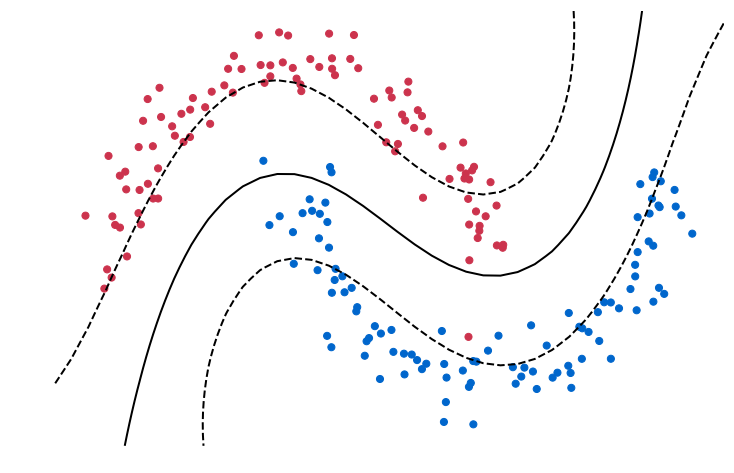

In [14]:
X, y = make_moons(n_samples=200, noise=0.10)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=discrete_cmap)

clf = SVC(kernel='rbf') #use the radial basis function instead of the linear one.
clf.fit(X, y)
plots.draw_svm_decission_function(clf, colors='black', label='SVM')

The same approach works for other linear methods as well. 

What makes SVM's so special?:

+ SVM's have proven to perform very well for many use-cases.

+ SVM's handle large number of dimensions relativly fast.

+ The kernel functions basically come for free.

+ Easily extendable to multi-class problems.


Kernel functions are constrained to fulfill certain criteria. *(See Chapter 12.3.1 in the Hastie Book)*

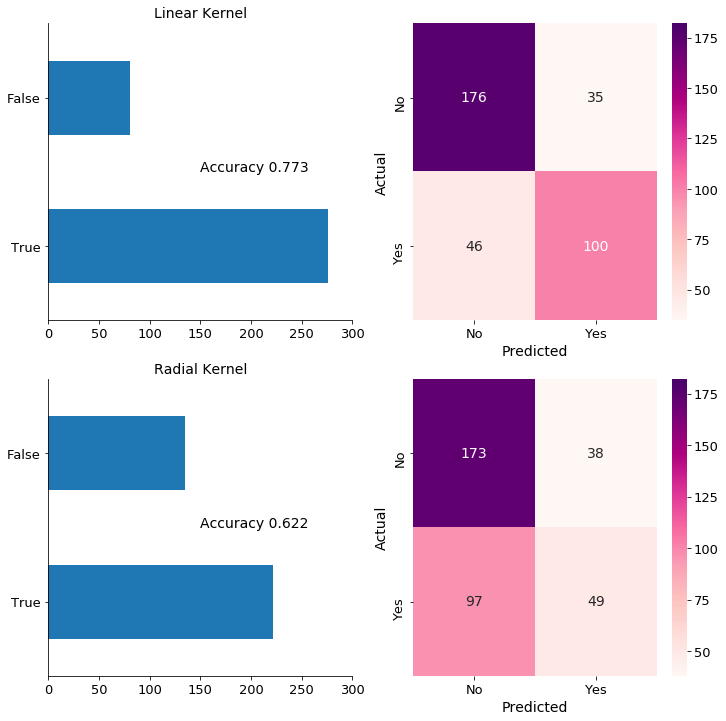

In [15]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

X = data[['Sex_Code', 'Pclass_Code', 'Fare', 'Age']]
y = data['Survived_Code']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)


# Use linear kernel
reg = SVC(kernel='linear')
reg.fit(X_train, y_train)
prediction_linear = reg.predict(X_test)

# Use the rbf kernel
reg_rbf = SVC(kernel='rbf')
reg_rbf.fit(X_train, y_train)
prediction_rbf = reg_rbf.predict(X_test)

fig, ([ax1, ax2], [ax3, ax4]) = plt.subplots(2, 2, figsize=(12, 12))
plots.plot_bars_and_confusion(truth=y_test, prediction=prediction_linear, axes=[ax1, ax2], vmin=0, vmax=182)
plots.plot_bars_and_confusion(truth=y_test, prediction=prediction_rbf, axes=[ax3, ax4], vmin=0, vmax=182)
ax1.set_title('Linear Kernel')
ax3.set_title('Radial Kernel')
ax1.set_xlim([0, 300])
ax3.set_xlim([0, 300])
None


##### Extending SVMs to more dimensions

The Titanic dataset we looked at in the previous excercise had four observed variables or dimensions and 714 observations in total. 

        > X = data[['Sex_Code', 'Pclass', 'Fare', 'Age']]
        > X.shape
        (714, 4)

Now we take a dataset that has 64 variables. 

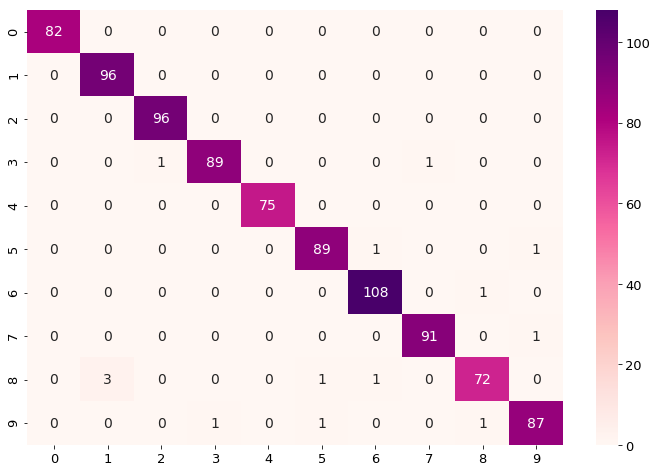

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import datasets
from sklearn.svm import SVC
X, y = datasets.load_digits( return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

#SVC with default settings.
clf = SVC(kernel='poly')

# We learn the kernel on the first half of the data
clf.fit(X_train, y_train)

# Now predict the value of the digit on the test sample
y_prediction = clf.predict(X_test)

cm = confusion_matrix(y_test, y_prediction)

sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='RdPu',
)
None

__What mystery data did we just classifiy?__

The SVM can easily classifiy a dataset of many observables and target classes.

This data set had 64 observables and 10 different classes.

Lets take the 64 numbers in the single observations and plot them into a $8\times8$ grid

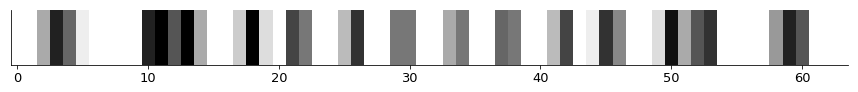

In [17]:
from sklearn import datasets, svm, metrics
X, y = datasets.load_digits(return_X_y=True)
plt.figure(figsize=(15, 1))
plt.imshow([X[0]], aspect='auto', cmap='gray_r',)
plt.grid('off')
plt.yticks([])
None

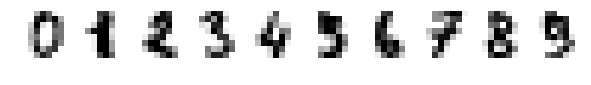

In [18]:
X, y = datasets.load_digits(return_X_y=True)

fig, axs = plt.subplots(1, 10, figsize=(10, 10))
for i, x_i in enumerate(X[:10]):
    ax = axs[i]
    img = x_i.reshape(-1, 8)
    ax.imshow(img, cmap='gray_r', interpolation='nearest')
    ax.grid('off')
    ax.axis('off')

This classifier just performed __character recognition__ on raw image inputs without any feature engineering.

Currently there is a lot of buzz (or even hype) about image recognition tasks and neural networks (Deep Learning etc.)
Neural networks and SVMs are very similar in nature they just use slightly modified loss functions.

For further information please checkout Stanford's computer science lecture CS231n, especially the chapter on linear classification.

[http://cs231n.github.io](http://cs231n.github.io)

## Local Optimization and Decission Trees

So far we looked at loss functions which optimized some global optimization criterion.

We have seen that not all problems can be solved by a linear model. It is often not possible to
find a transformation, or kernel function, to transform the data into linearly seperable classes.

Neither by hand nor by some automated procedure. The idea of local optimization methods is to split the 
parameter space into subspaces where the problem is easier to solve.

Idea:
* Split the parameter space into many subspaces where observations of the same class live.

We split the space into two regions 

$$
R_1(j, s) = \{X |\, X_j \le s\}
$$

and 

$$
R_2(j, s) = \{X |\, X_j \gt s\}.
$$

These regions define half-planes in the parameter space.

In the example below we define 4 half-planes/regions to select the region in space where the blue points life. 
Now we can optimize a loss function in each of the overlapping regions.

In the example below we can simply use a decission function that is constant in each region.

$$
f(x) = \sum_{m=1}^{M} c_m \mathbb{I}(x \in R_m)
$$

where 

$$
\mathbb{I}(x \in R_m) =\begin{cases}
1,  & \text{if $x \in R_m$} \\
0, & \text{otherwise}
\end{cases}
$$


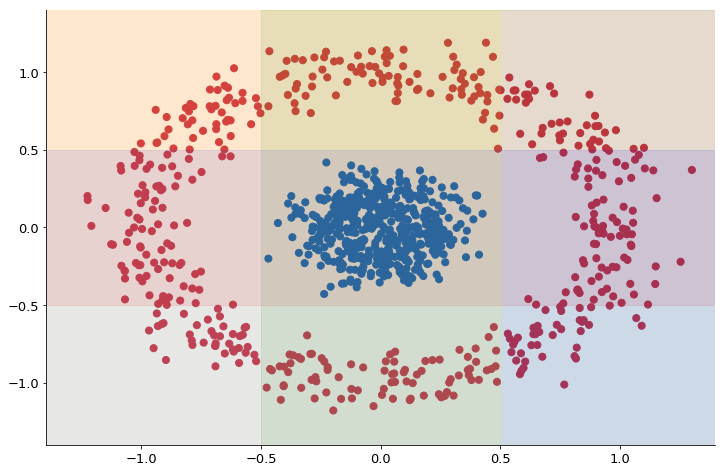

In [19]:
from sklearn.datasets.samples_generator import make_circles

X, y = make_circles(n_samples=1000, noise=0.10, random_state=0, factor=0.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=discrete_cmap)


plt.axhspan(-0.5, 1.5, color='red', alpha=0.1)
plt.axvspan(-0.5, 1.5, color='green', alpha=0.1)

plt.axhspan(0.5, -1.5, color='blue', alpha=0.1)
plt.axvspan(0.5, -1.5, color='yellow', alpha=0.1)

plt.xlim([-1.4, 1.4])
plt.ylim([-1.4, 1.4])
None

Now we choose the constant $c_m$ to be the average target value in that region. 

$$
c_m  = \frac{1}{N} \sum_{x_i \in R_m} y_i
$$

This works extremly well in the example below. The question remains on how to find the splits.
This problem is again NP-Hard and therefore takes too long to solve. 
We can however employ a greedy strategy again. 

Algorithms performing these steps are called __Decission Tree__ methods.

We perform recursive binary splits of the subspace using the split which yields the lowest value for the loss function. 

The loss function this time is called the Information Gain. 
To find the best split in a node, we maximize the Information Gain, $IG$,  over all features  $X \in \mathbf{X}$ and splits

$$
  IG(X,Y) = H(Y) - H(Y |\, X).
$$

where $H$ is the entropy function

\begin{equation}
  H(Y) = - \sum_{z \in Z} P(Y=z) \log_2{P(Y=z)}.
\end{equation}

for the random variable $Y$ which takes values from the finite set of symbols $Z$

and $H(Y |\, X)$ is the conditional entropy.

\begin{aligned}
    H(Y |\, X)  &=  \sum_{m \in M}P(X = m) H(Y |\, X = m)  \\
       &= - \sum_{m \in M}P(X = m) \sum_{z \in Z} P(Y = z |\, X = m)\log{P(Y = z |\, X = m)}.
\end{aligned}

Similar to Naive Bayes we don't know the probability distributions. This time we simply assume uniform distributions.

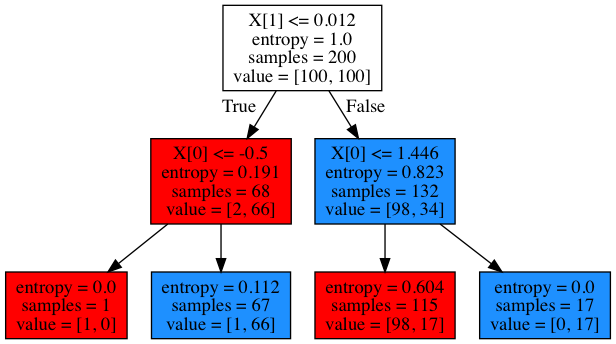

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_moons
np.random.seed(1234)

X, y = make_moons(n_samples=200, noise=0.10)
clf = DecisionTreeClassifier(max_depth=2, criterion='entropy')
clf.fit(X, y)

from IPython.display import Image
Image(plots.draw_tree(clf))

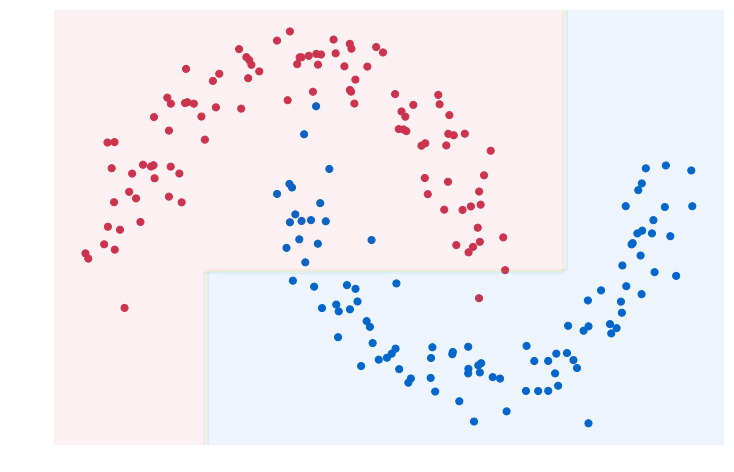

In [21]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=discrete_cmap)
plots.draw_decission_boundaries(clf, cmap=discrete_cmap)

Outline for a tree building algorithm.

        def build_tree(space)
            if stopping_criterion_fulfilled():
                return {}
             
            variable, split_point = find_best_split(space)
                        
            left, right = split_space(space, variable, split_point)

            left_tree = build_tree(left)
            right_tree = build_tree(right)
               
            return {'node' : (variable, split_point), 'left': left_tree, 'right': right_tree}
            

For classification the best split in a node $m$ of the tree is found by minimizing an impurity measure $Q_m$.

Popular ones include Information Gain, Cross-Entropy or the Gini index. 

They all work by looking at one variable at a time and then iterating over all the possible splits to find the minimal $Q_m$

Implementations across languages/libraries are similar but differ in their choice of $Q_m$ and handling of continous variables.

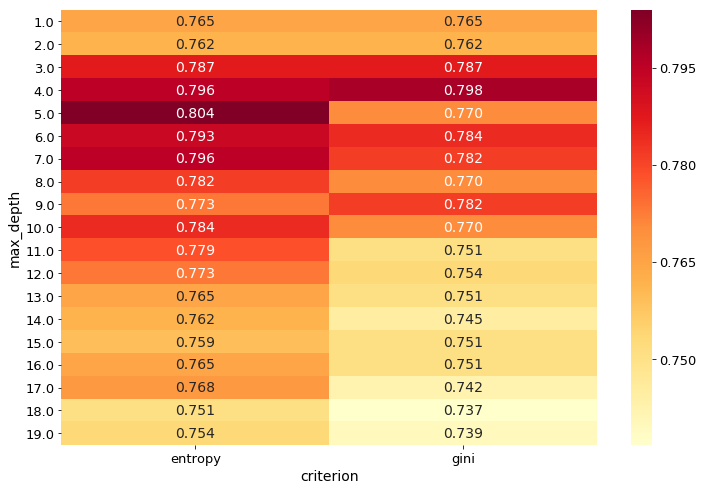

In [22]:
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
np.random.seed(1235)

# load the data
X = data[['Sex_Code', 'Pclass_Code', 'Fare', 'Age']]
y = data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

# loop over every possible combination of parameters 
df = pd.DataFrame()
ps = ParameterGrid({'max_depth':range(1, 20), 'criterion':['entropy', 'gini']})
for d in ps:
    clf = DecisionTreeClassifier(max_depth=d['max_depth'], criterion=d['criterion'])
    clf.fit(X_train, y_train)
    acc = accuracy_score(y_test, clf.predict(X_test))
    df = df.append({'max_depth': d['max_depth'], 'criterion': d['criterion'], 'accuracy': acc}, ignore_index=True)

# plot a heatmap to see the best paramter combination. 
df = df.pivot('max_depth', 'criterion', 'accuracy')
sns.heatmap(df, cmap='YlOrRd', annot=True, fmt='.3f')
None


## Classifier Validation 

### k - Nearest Neighbour Methods

The k-NN classifier is  a good example of a model that can be easily overfitted. 

Lets assume that the decission function is constant over some local region in the parameter space:

$$
\hat{f}(x_0) = \hat{y} = \frac{1}{k} \sum_{x_i \in N_k(x_o)} y_i
$$

where $x_i \in N_k(x)$ describes the $k$ points in the training data $\mathbf{X}$ that are in the *neighbourhood* of $x_0$.

To put it in words. We assume $x$ will have the same $y$ as other points nearby.

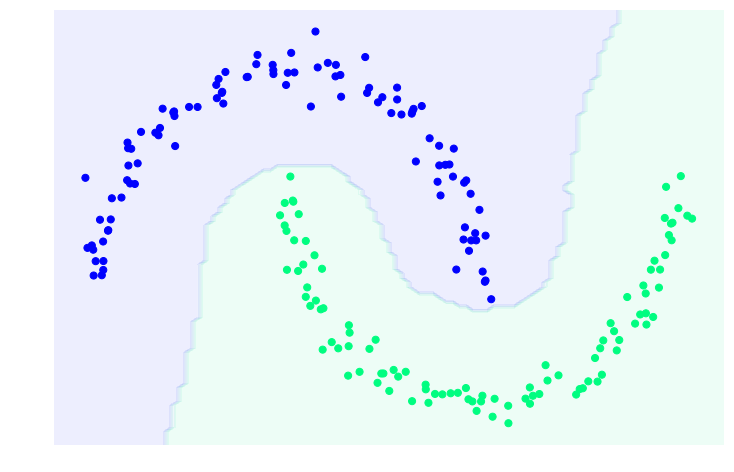

In [23]:
from sklearn.datasets.samples_generator import make_moons
from sklearn.neighbors import KNeighborsClassifier

X, y = make_moons(n_samples=200, noise=0.05)


knn = KNeighborsClassifier(n_neighbors=25)
knn.fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')
plots.draw_decission_boundaries(knn)

This works pretty well in this artifical, low-noise, example. 

Classification on noisy data will not work as good.

Real world data always has some form of noise.

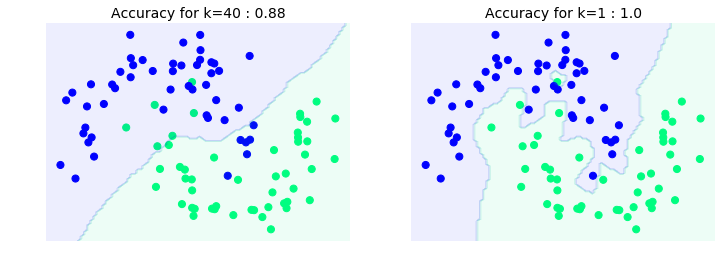

In [24]:
np.random.seed(1234)
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

X, y = make_moons(n_samples=100, noise=0.2)

knn = KNeighborsClassifier(n_neighbors=40)
knn.fit(X, y)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
ax1.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')
plots.draw_decission_boundaries(knn, ax=ax1)
ax1.set_title('Accuracy for k=40 : {}'.format(accuracy_score(y, knn.predict(X))))
ax1.axis('off')

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)

ax2.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')
plots.draw_decission_boundaries(knn, ax=ax2)
ax2.set_title('Accuracy for k=1 : {}'.format(accuracy_score(y, knn.predict(X))))
ax2.axis('off')
None

### Overfitting (Bias-Variance Tradeoff)

Assume the target $y$ is generated by some function $f(x)$ with added gaussian noise $\epsilon$

$$
y = f(x) + \epsilon, \qquad \epsilon \propto \mathcal{N}(\mu=0, \sigma)
$$

The mean squared error ($mse$) of the predictor function $\hat{f}(x) = \hat{y}$ is

$$
mse(y, \hat{f}) = (y - \hat{f}(x))^2 .
$$

Calculate the expectation value $mse$ 

$$
E[mse(y, \hat{f}) ] = E[(y - \hat{f}(x))^2]
$$

Some mathematical definitions up front.

__Variance__ of a random variable $X$ 
  
  $$
  Var(X) = E[(X - E[X])^2] = E[X^2] - E[X]^2 \iff     E[X^2] = Var[X] +  E[X]^2 
  $$
  
__Bias__ of an estimator $\hat{f}$

  $$
  Bias(\hat{f}) = E[\hat{f} - f] = E[\hat{f}] - E[f] = E[\hat{f}] - f
  $$

Since $f$ is a fixed function

$$
E[f] = f
$$

Using these definition on $y$ gives

\begin{align}
Var[y] = Var[ f(x) + \epsilon]  & = Var[f(x)] + Var[\epsilon] \\
                                & = Var[f(x)] + \sigma^2 \\
                                & = E[f(x)^2] - E[f(x)]^2 + \sigma^2 \\
                                & = f(x)^2 - f(x)^2 + \sigma^2 \\
                                & = \sigma^2 
\end{align}

Finally calculating $E[mse(y, \hat{f})]$ yields

\begin{align}
 E[(y - \hat{f}(x))^2]  & = E[y^2 + \hat{f}^2 - 2y\hat{f}] \\
                        & \ldots \\
                        & = \sigma^2 + Var[\hat{f}] + Bias[\hat{f}]^2.
\end{align}

For the k-NN classifier there exists an analytical expression for $E[mse(y, \hat{f})]$.

Using 
$$
\hat{f}(x) = \hat{y} = \frac{1}{k} \sum_{x_i \in N_k(x)} y_i
$$

and once again assuming the data is subject to normally distributed noise $\epsilon$

$$
y_i = f(x_i) + \epsilon_i
$$

one can calculate 

$$
 E[(y - \hat{f}(x))^2] = \sigma^2 + Var[\hat{f}] + Bias[\hat{f}]^2.
$$


Starting with $Var(\hat{f})$

\begin{align}
Var(\hat{f(x_0)}) &= Var \left( \frac{1}{k} \sum_{y_i \in N_k(x_0)} y_i \right)  \\
&= \frac{1}{k^2}  \sum_{y_i \in N_k(x_0)} Var \left( f(x_i) + \epsilon_i \right)  \\
&= \frac{1}{k^2}  \sum_{y_i \in N_k(x_0)} Var \left( f(x_i) \right) + Var \left( \epsilon_i \right)  \\
&= \frac{1}{k^2}  \sum_{y_i \in N_k(x_0)} Var \left( \epsilon_i \right)  \\
&= \frac{1}{k^2} k \sigma^2  \\
&= \frac{\sigma^2}{k}
\end{align}

Now the bias term

\begin{align}
    Bias^2(\hat{f}) & = \left( E[\hat{f} - y] \right)^2 \\
                    & = \left( E[\frac{1}{k} \sum_{y_i \in N_k(x_0)} y_i - y] \right)^2 \\
                    & = \left( E[\frac{1}{k} \sum_{y_i \in N_k(x_0)} f(x_i) + \epsilon_i - ( f(x_0) + e_0 )] \right)^2 \\
                    & = \left( \frac{1}{k} \sum_{y_i \in N_k(x_0)} f(x_i) - f(x_0) \right)^2
\end{align}

Putting it together gives 

$$
 E_{knn}[(y - \hat{f}(x))^2] = \sigma^2 + Var[\hat{f}] + Bias[\hat{f}]^2 = \sigma^2 + \frac{\sigma^2}{k} + \left( \frac{1}{k} \sum_{y_i \in N_k(x_0)} f(x_i) - f(x_0) \right)^2.
$$

The expectation of mean squared error depends on the choice of $k$ and the noise of the data $\sigma$. 

When $k$ grows, the dependency on the data noise decreases but the bias increases.

This so called Bias-Variance dillemma is a universal problem in supervised machine learning. 

There are two error sources:

* High bias might decrease overall predictor performance.
* High variance can make the learned paramters prone to noise in the training data.  

If the parameters are tuned to the noise in the training data, the model will not generalize to new data. 

This problem is called __overfitting__

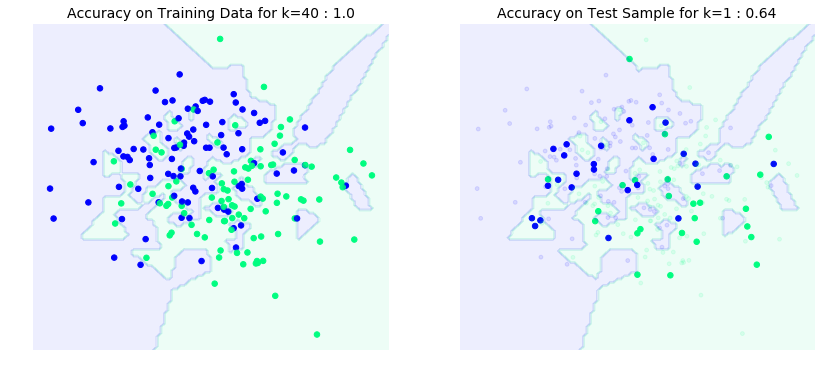

In [25]:
np.random.seed(1234)

X, y = make_moons(n_samples=200, noise=0.7)
X_test, y_test = make_moons(n_samples=50, noise=0.7)


knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
ax1.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap='winter')
plots.draw_decission_boundaries(knn, ax=ax1)
ax1.set_title('Accuracy on Training Data for k=40 : {}'.format(accuracy_score(y, knn.predict(X))))
ax1.axis('off')

ax2.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=30, cmap='winter')
ax2.scatter(X[:, 0], X[:, 1], c=y, s=15, alpha=0.1,  cmap='winter')
plots.draw_decission_boundaries(knn, ax=ax2)
ax2.set_title('Accuracy on Test Sample for k=1 : {}'.format(accuracy_score(y_test, knn.predict(X_test))))
ax2.axis('off')
None

In [26]:
from sklearn.metrics import mean_squared_error

np.random.seed(1234)
X, y = make_moons(n_samples=400, noise=0.2)
X_test, y_test = make_moons(n_samples=400, noise=0.2)

e_train = []
e_test = []
for k in range(1, 200):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)
    e_train.append(mean_squared_error(y, knn.predict(X)))
    e_test.append(mean_squared_error(y_test, knn.predict(X_test)))

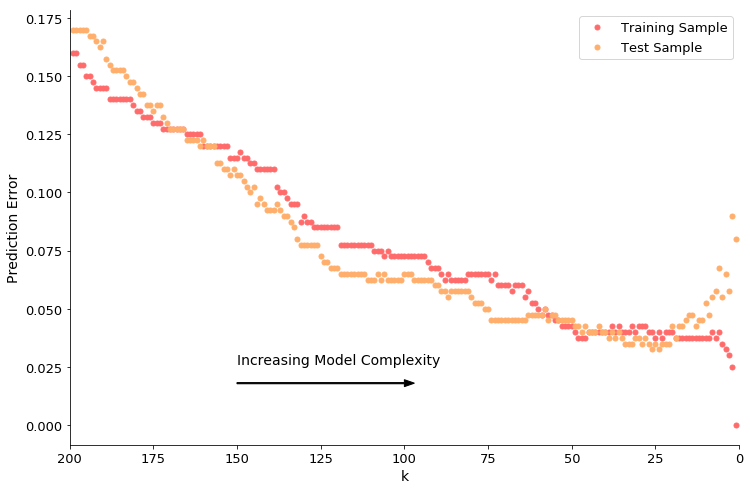

In [27]:
plt.plot(range(1, 200), e_train,'.', color='#FF6B6B', ms=10, label='Training Sample')
plt.plot(range(1, 200), e_test, '.' ,color='#FFAE6B', ms=10, label='Test Sample', )
plt.xlim(200, 0)
plt.xlabel('k')
plt.ylabel('Prediction Error')

plt.text(150, 0.026, 'Increasing Model Complexity')
plt.arrow(150, 0.018, -50, 0, width = 0.0005, head_width=0.003, head_length=3, fc='k', ec='k')
plt.legend()

### Validation on independent test sets

Validating the fitted models is essential for avoiding overfitting.

The predictions error has to be assesed on an independent test dataset. 

Models might still be susceptible to noise in the training data.

#### Cross Validation

A $k$-fold cross validation automatically splits the training data into $k$ subsets.

The model is then trained on $k-1$ subsets and evaluated on the remaining set. 

In [28]:
%%HTML
    <style>
    .training_set { fill: #FF6B6B;}
    .test_set { fill: #FFAE6B; }
    </style>
<h4> 5-Fold Cross Validation </h4>
<p> First Iteration: </p>
<p> </p>
<svg width="800" height="140">
<g transform="scale(0.9)">
  <rect x="0", y="0", width="150" height="80" class="training_set" />
  <rect x="160", y="0", width="150" height="80" class="training_set" />
  <rect x="320", y="0", width="150" height="80" class="training_set" />
  <rect x="480", y="0", width="150" height="80" class="training_set" />
  <rect x="640", y="0", width="150" height="80" class="test_set" />
    
  <rect x="0", y="90", width="630" height="3" class="training_set" />
  <rect x="640", y="90", width="150" height="3" class="test_set" />
    
  <text x="0" y="115" class="training_set">
    Training Data
  </text>
  <text x="640" y="115" class="test_set">
    Test Data
  </text>
</g>
</svg>

<p> Second Iteration: </p>
<p> </p>
<svg width="800" height="140">
<g transform="scale(0.9)">
  <rect x="0", y="0", width="150" height="80" class="training_set" />
  <rect x="160", y="0", width="150" height="80" class="training_set" />
  <rect x="320", y="0", width="150" height="80" class="training_set" />
  <rect x="480", y="0", width="150" height="80" class="test_set" />
  <rect x="640", y="0", width="150" height="80" class="training_set" />
    
  <rect x="0", y="90", width="470" height="3" class="training_set" />
  <rect x="480", y="90", width="150" height="3" class="test_set" />
  <rect x="640", y="90", width="150" height="3" class="training_set" />
    
  <text x="0" y="115" class="training_set">
    Training Data
  </text>
  <text x="480" y="115" class="test_set">
    Test Data
  </text>
</g>
</svg>

<p> Third Iteration: </p>
<p> </p>
<svg width="800" height="140">
<g transform="scale(0.9)">
  <rect x="0", y="0", width="150" height="80" class="training_set" />
  <rect x="160", y="0", width="150" height="80" class="training_set" />
  <rect x="320", y="0", width="150" height="80" class="test_set" />
  <rect x="480", y="0", width="150" height="80" class="training_set" />
  <rect x="640", y="0", width="150" height="80" class="training_set" />
    
  <rect x="0", y="90", width="310" height="3" class="training_set" />
  <rect x="320", y="90", width="150" height="3" class="test_set" />
  <rect x="480", y="90", width="310" height="3" class="training_set" />
    
  <text x="0" y="115" class="training_set">
    Training Data
  </text>
  <text x="320" y="115" class="test_set">
    Test Data
  </text>
</g>
</svg>
<p>...</p>
<p>...</p>

#### Other Quality Metrics

Accuracy is not always a good measure of model quality.

Imagine a classifier function which simply predicts a fixed outcome.

        def f_fixed(x):
            return 0
            
On an imbalanced dataset this classifier will have an accuracy equal to the ratio of positive examples to the total number of examples.

In [29]:
def f_fixed(x):
    return np.zeros(shape=len(x))

data = read_titanic()

X = data
y = data['Survived_Code']

print('Accuracy of fixed classifier {:1.6f} \n'.format(accuracy_score(y, f_fixed(X))))

print('Ratio of survived to total passengers: ')
print(data.Survived.value_counts(normalize=True))


Accuracy of fixed classifier 0.593838 

Ratio of survived to total passengers: 
no     0.593838
yes    0.406162
Name: Survived, dtype: float64


Another view at the confusion matrix. It generalizes to more than two classes as seen in the picture below.

![A confusion matrix](./ml/images/confusion_matrix.png)

The numbers in the confusion matrix can be used to calculate a whole range of qulity criteria.

Lets build a classifier which randomly chooses an outcome and look at the different criteria.

```
def f_random(passenger):
    return np.random.choice(['yes', 'no')
```


<a href="https://stackoverflow.com/questions/31324218/scikit-learn-how-to-obtain-true-positive-true-negative-false-positive-and-fal" style="color:#BBBBBB;">The nice Stack Overflow post where I stole the picture from.</a>



In [30]:
def f_random(x):
    return np.random.randint(2, size=len(x))

prediction = f_random(X)
cm = confusion_matrix(y, prediction)

FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

print(TPR, TNR, PPV, NPV, FPR, FNR, FDR, ACC)

[ 0.5259434   0.53448276] [ 0.53448276  0.5259434 ] [ 0.62290503  0.43539326] [ 0.43539326  0.62290503] [ 0.46551724  0.4740566 ] [ 0.4740566   0.46551724] [ 0.37709497  0.56460674] [ 0.52941176  0.52941176]


In [31]:
from sklearn.metrics import recall_score, precision_score
print(recall_score(y, prediction))
print(precision_score(y, prediction))

0.534482758621
0.435393258427


Precission and recall can be understood in an intuitive way

* __Recall__ How many of the wanted examples are found.
* __Precission__ The percentage of the found examples that are actually relevant.

So what should you optimze for? Maximumg accuracy or precission or recall?

There is no clear answer. It depends on your use-case. Can you tolerate false positives? 
Can you tolerate losing some true positives?

We will always have to make the trade-off between recall and precission. 
There are several metrics which try to combine both into one.

The $f_{\beta}$ score is one example.

$$
f_{\beta } = (1+\beta ^{2})\cdot {\frac {\mathrm {precision} \cdot \mathrm {recall} }{(\beta ^{2}\cdot \mathrm {precision} )+\mathrm {recall} }} =
\frac {(1 + \beta^2) \cdot TP }{(1 + \beta^2) \cdot TP + \beta^2 \cdot FN + FP}.
$$

But in the end there is no absolute truth to whats best.



#### Discussion

Imagine you devise a new, cheap and easy cancer test. 
What should you optimize your decission threshold for?
Precission or recall?

#### Excersise 4 (10-15 Minutes)

scikit-learn comes with several functions to make working with cross validations easy.

1. Read the Titanic dataset into a dataframe. 
2. Calculate cross validated accuracy, recall, precision and f1 score using `sklearn.model_selection.cross_validate` with a 5-fold CV for a k-NN, SVM and DecissionTree classifier.
3. Print or plot the mean and standard deviation of the accuracies for each classifier.

In [32]:
# %load ./ml/solutions/exercise_5.py

## Decission Thresholds and Classifier Validation

Classifier objects usually provide all of the following methods

* `classifier.fit(X)` takes training data and finds some parameters based on that data.
* `classifier.predict(X_new)` takes new data (one row or many) and predicts the target label for each row.
* `classifier.predict_proba(X_new)` takes new data (one row or many) and predicts 'some notion of confidence'.

In the case of binary classification (i.e. two classes) the `classifier.predict_proba` usually returns a number where higher numbers indicate some measure of 'confidence'.

The `classifier.predict(X_new)` is basically a a wrapper around the `predict_proba` function which simply applies a decission threshold at some value (usually 0.5).
This is exactly what we did in the case of linear least squares regression.


$$
\hat{Y} = \begin{cases}
\text{Yes}, & \text{if $ f(X) \gt 0.5$} \\
\text{No}, & \text{if $ f(X) \le 0.5$}
\end{cases}
$$

In this case the decission threshold corresponds to the distance of a point to the seperating hyperplane.


In [33]:
#verstecken
# %load ./ml/solutions/exercise_1.py

But what does this say about the actual probability of a new data point being of either class?

In the case above, data created by two gaussian distributions, the distance certainly maps to the underlying probability density in *some* way. But it is in no way an actual *significance* or *confidence*

The function `predict_proba` is a slight misnomer. While some classifiers return numbers between 0 and 1, by no means do all classifier return the desired probability estimate.

Still the number can be interpreted as some level of 'certainty' in many cases.

Varying the decission threshold is extremely usefull for modifying your classifier output to create more/less 'conservative' predictions.


In essence this is a new classifier/predictor with a free parameter. The old $\hat{y} = \hat{f}(x)$ now becomes

$$
\hat{y} = \hat{f}(x, \alpha)
$$

where $\alpha$ is a parameter which can be chosen freely (or optimized according to some criterion which has nothing to do with the underlying loss function of the predictor.)

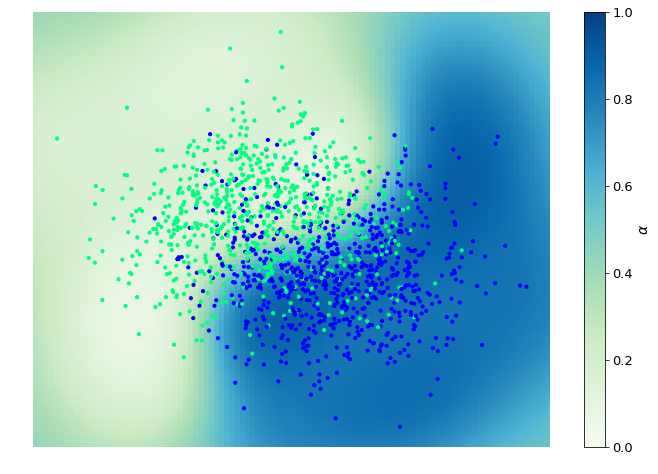

In [34]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1500, noise=0.6)
plt.scatter(X[:, 0], X[:, 1], c=y, s=10, cmap='winter_r')

X_train, X_test, y_train, y_test = train_test_split(X, y)

clf = SVC(probability=True)
clf.fit(X_train, y_train)
predictions = clf.predict_proba(X_test)[:,1]

plots.draw_decission_surface(clf, predictions, label=r'$ \alpha $')

None

#### Classifier Calibration

There are ways to transform the output of a classifiers into more reasonable probability estimates. 

This process is often called classifier calibration. There is a detailed guide in sklearn's documentation

http://scikit-learn.org/stable/modules/calibration.html



#### Receiver Operating Characteristic 

The decission threshold is incredibly helpful in validating classifier performance.

The plot of false positive rate vs. true positive rate while varying the decission threshold is called the Receiver Operating Characteristic curve (ROC curve).

It is a very popular tool for classifier performance evaluation.

Wikipedia Quote:

> Following the attack on Pearl Harbor in 1941, the United States army began new research to increase the prediction of correctly detected Japanese aircraft from their radar signals. For this purposes they measured the ability of radar receiver operators to make these important distinctions, which was called the Receiver Operating Characteristics.


A classifier which assigns random labels to the data will have a ROC curve which lies on the diagonal. With an area under curve (AUC) of 0.5.


__Problems__

There are circumstance in which the ROC is not a good measure of quality. 

See https://en.wikipedia.org/wiki/Receiver_operating_characteristic#Area_under_the_curve for a discussion.

Also in the case of imbalanced classes (eg. imagine you had 10000 surviors but 10 deceased passengers) the ROC curve itself won't change. The intepretation of the ROC curve however changes drastically.

In that case its better to plot the precission vs recall curve and the corresponding area under curve.

See https://classeval.wordpress.com for some very good discussions on classifier evaluation.

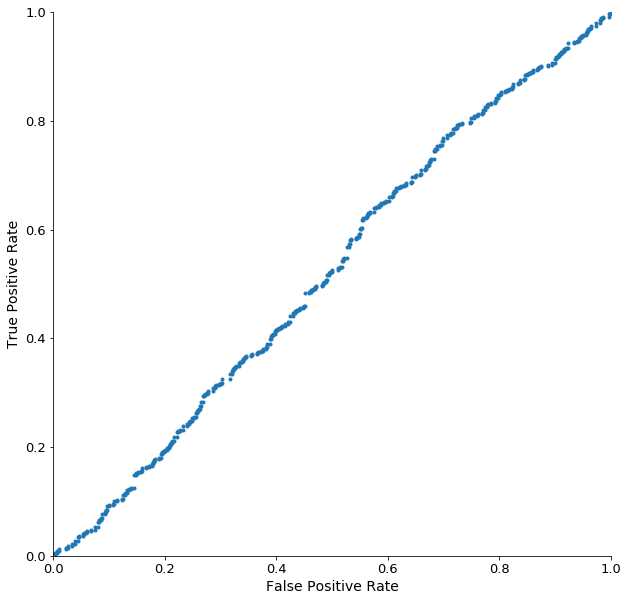

In [ ]:
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve

X, y = make_classification(n_samples=1000)

prediction = np.random.uniform(size=len(y))

fpr, tpr, _ = roc_curve(y, prediction)
plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, '.')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [ ]:

from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

np.random.seed(1234)
data = read_titanic()

X = data[['Sex_Code', 'Pclass_Code', 'Fare', 'Age']]
y = data['Survived_Code']

svc = SVC(kernel='linear')
knn = KNeighborsClassifier(n_neighbors=5)
tree = DecisionTreeClassifier(max_depth=5)

results = []
for clf, name in zip([svc, knn, tree], ['SVM', 'kNN', 'tree']):
    r = cross_validate(clf, X=X, y=y, cv=5, scoring=['accuracy', 'precision', 'recall', 'f1'])
    df = pd.DataFrame().from_dict(r)
    df['classifier'] = name
    results.append(df)

df = pd.concat(results).drop(['fit_time', 'score_time'], axis='columns')

means = df.groupby('classifier').mean()
deviations = df.groupby('classifier').std()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))
sns.heatmap(means, cmap='viridis', annot=True, ax=ax1, vmin=0, vmax=1)
sns.heatmap(deviations, cmap='viridis', annot=True, ax=ax2, vmin=0, vmax=1)


## Ensemble Methods

We have used a decission tree to classifiy artificial data as well as the Titanic data. 

Theoretically a decission tree is not limited in its depth. 

This quickly leads to overfitted tree models.


In [ ]:
np.random.seed(1)
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=5000, noise=0.30)
clf = DecisionTreeClassifier(max_depth=300, criterion='entropy')
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=3, cmap='winter')
plots.draw_decission_boundaries(clf)

As mentioned in the discussion about decission trees earlier, the tree building algorithms try to find the optimal split criterion in some local region of the parameter space.

Finding the best overal split in parameter space is computationaly infeasible.

This means the decission tree algorithm can run into a local optimum. 

The idea of _ensemble learning_ is to train several weak (high bias, low variance) base classifiers on different subsets of the data and then combine them into one big classifier.

#### Bagging

A popular way to build ensembles is called *bagging*.

Split the training data into $B$ subsets using sampling with replacement (Bootstrapping). For each subset $b$ we train a classifier $\hat{f}_b$. Bagging then combines the overall prediction by taking the average.  

$$
\hat{y} = \hat{f}_{\text{bag}}(x) = \frac{1}{B} \sum_{b=1}^B \hat{f}_b (x) 
$$

#### Random Forests

Random Forests are a modification to bagging in which a number of *randomized decission trees* are trained. These randomized decission trees use a random subset of variables to find the best split in each node.

        def build_random_tree(space)
            if stopping_criterion_fulfilled():
                return {}
            
            random_variable_choice = choose_random_selection_of_variables()
            variable, split_point = find_best_split(space, random_variable_choice)
                        
            left, right = split_space(space, variable, split_point)

            left_tree = build_tree(left)
            right_tree = build_tree(right)
               
            return {'node' : (variable, split_point), 'left': left_tree, 'right': right_tree}

Random Forests are a very popular choice for classification tasks since their parameters can be easily tuned and they often outperform other methods.

In [ ]:
np.random.seed(2)
from sklearn.metrics import roc_curve, roc_auc_score, make_scorer
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

data = read_titanic()

X = data[['Sex_Code', 'Pclass_Code', 'Fare', 'Age', 'SibSp']]
y = data['Survived_Code']

tree = DecisionTreeClassifier(min_samples_leaf=5)

rf = RandomForestClassifier(n_estimators=20, min_samples_leaf=5)

score = cross_validate(tree, X, y, scoring=make_scorer(roc_auc_score), cv=5)
print('ROC AUC Decission Tree {:0.3f} +/- {:0.3f}'.format(score['test_score'].mean(), score['test_score'].std()))

score = cross_validate(rf, X, y, scoring=make_scorer(roc_auc_score), cv=5)
print('ROC AUC Random Forest {:0.3f} +/- {:0.3f}'.format(score['test_score'].mean(), score['test_score'].std()))

plots.draw_decission_boundaries(rf)

## Regression

Regression and classification are very similar in nature. The biggest difference being that the target variable $y$ is continous and has a natural ordering associated with it. 

The same basic rules for classification apply for regression as well. 

* Models need to be verified on independent test data
* There is a tradeoff between bias and variance. Overfitting can occur.
* There are many quality measures to pick from. 


Lets try and use regression to predict housing prices.

In [ ]:
from sklearn.datasets import load_boston
from IPython.display import Markdown, display
houses = load_boston()

display(Markdown(houses.DESCR))

In [ ]:
names = list(houses['feature_names']) +  ['price']
data = pd.DataFrame(data=np.c_[houses['data'], houses['target']], columns=names)
data

Our regression task is to predict the price of a house from the 13 given variables. From a plot of some of the variables we can see some weak correlations in some variables.

None of these variables alone would suffice to build a good predictor. Hence we try to use multivariate regression methods.

In [ ]:
sns.pairplot(data[['INDUS', 'RM', 'NOX', 'AGE', 'price']])

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_validate

X, y = load_boston(return_X_y=True)

reg = LinearRegression()
score = cross_validate(reg, X, y, cv=5, scoring='neg_mean_absolute_error')
print('Score linear regression {:0.3f} +/- {:0.3f}'.format(score['test_score'].mean(), score['test_score'].std()))

reg = SVR(kernel='rbf')
score = cross_validate(reg, X, y, cv=5, scoring='neg_mean_absolute_error')
print('Score SVR {:0.3f} +/- {:0.3f}'.format(score['test_score'].mean(), score['test_score'].std()))

reg = DecisionTreeRegressor()
score = cross_validate(reg, X, y, cv=5, scoring='neg_mean_absolute_error')
print('Score Tree {:0.3f} +/- {:0.3f}'.format(score['test_score'].mean(), score['test_score'].std()))

reg = RandomForestRegressor()
score = cross_validate(reg, X, y, cv=5, scoring='neg_mean_absolute_error')
print('Score RandomForestRegressor {:0.3f} +/- {:0.3f}'.format(score['test_score'].mean(), score['test_score'].std()))

In [ ]:
reg = RandomForestRegressor()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
reg.fit(X_train, y_train)
prediction = reg.predict(X_test)

bin_edges = np.linspace(0, 60, 30)
plt.hist2d(prediction, y_test, bins=bin_edges, cmap='viridis',)
plt.colorbar()
plt.grid()
plt.plot([0, 60], [0, 60], color='gray')
None

The output of the predictor shows stronger correlation than any of the other variables. It is still noisy and shows some smearing and outliers. The output of a regressor should never be understood as 'true' but rather as a new correlated variable which can show noise and bias. 

There is a fundemental difference between *curve fitting* and regression.

* __Curve Fitting__ All data is available. Some known (or presumed) analytical function is fit to the data to estimate free parameters of that function.


* __Regression__ Training data is available. A model is fitted on training data to predict the dependent variable on some new, unknown, data.

There is a lot more to learn about linar models and regression. Check sklearn's user guide on linear models for more information 
http://scikit-learn.org/stable/modules/linear_model.html

A very popular regression metric is the $R^2$ score. Read about it here

https://en.wikipedia.org/wiki/Coefficient_of_determination

and here

http://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html .

# Machine Learning (Unsupervised)

## Mathematical Notation and Problem Description

So far we have been occupied with 
predicting the values of one or more outputs or response variables $Y = (Y_1, \ldots, Y_m)$ for a given set of input or predictor variables $X = (X_1, \ldots , X_p)$. 

We have defined the loss functions $L(y, \hat y)$ to characterise how well we 'learned' some model $\hat f(x)$.

In unsupervised learning we have no given $Y$.
These methods try to find the underlying (joint) probability density $Pr(X)$ so that we might learn some properties about it.

One common question is whether $X$ is created by a mixture of two or more underlying random variables.

One can visualize this problem by looking at the following plot.

In [ ]:
np.random.seed(1234)
from sklearn.datasets import make_blobs

# random number between 1 and 3
k = np.random.randint(1, 4)
X, y = make_blobs(n_samples=300, centers=k, center_box=(-2, 2), cluster_std=0.5)

plt.scatter(X[:, 0], X[:, 1])
plt.axis('off')
None

Can one infer $Pr(X)$ by looking at $X$, i.e. the blue dots?

In this case we know that this distribution of blue dots, $X$, was created by joining $k$ two dimensional gaussians with known standard deviation.
This is just what 

    X, y = make_blobs(n_samples=300, centers=k, center_box=(-2, 2), cluster_std=0.5)
 
does.
We even know in what region of space we have to look for the centroids of these blobs. 

In [ ]:
import matplotlib
cmap = matplotlib.cm.get_cmap('Set1')
plt.scatter(X[:, 0], X[:, 1], c=cmap(y))
plt.axis('off')
None

## Clustering Alogrithms

Clustering algorithms try to find modes of $Pr(X)$ based on densities, neighbourhood relations or any other measure of 'similarity'  between points.

More generally speaking to quote wikipedia again:

>Cluster analysis or clustering is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar (in some sense or another) to each other than to those in other groups (clusters).


### K-Means Algorithm

The k-Means algorithm (or Loyds algorithm) tries to find a partition of the data into $k$ clusters $S = \{S_1, \ldots, S_k\}$  which minimize the variance within those clusters. The number of clusters $k$ has to specified by the user.

Formally speaking the algorithm solves
$$
{\underset {S}{\operatorname {arg\,min} }}\sum _{S_i \in S}\sum _{x \in S_{i}}\left\|x -{\overline{x}}_{S_i}\right\|^{2}.
$$

It does so iterativly according to the following steps 

1. Pick some initial cluster means (or centroids) $\{m_1, \ldots, m_k \}$ either randomly or according to some heuristic.

2. Create a partition $S$  by assigning each point $x \in X$ to the cluster $S_i$ where the distance to $m_i$ is the smallest.

3. Update the cluster means by calculating the means within the assigned clusters. 

4. Repeat steps 2 and 3 until convergence.


In [ ]:
np.random.seed(1234)
from sklearn.cluster import KMeans

X, y = make_blobs(n_samples=300, centers=k, center_box=(-2, 2), cluster_std=0.5)

prediction = KMeans(n_clusters=3).fit_predict(X)

# shift the colors
prediction = (prediction + 2 ) % 3

plt.scatter(X[:, 0], X[:, 1], facecolor='', edgecolors=cmap(prediction), lw=2,  s=380, label='prediction')
plt.scatter(X[:, 0], X[:, 1], c=cmap(y), label='truth')
plt.legend(loc='upper left')
plt.axis('off')
None

The k-Means algorithm works well on convex clusters with similar standard deviations. But it fails on elongated or concave shapes.


In [ ]:
np.random.seed(170)
X, y = make_blobs(n_samples=300, centers=3,)
transformation = [[0.4, -0.8], [-0.4, 0.4]]
X_elongated = np.dot(X, transformation)
prediction = KMeans(n_clusters=3,).fit_predict(X_elongated)


plt.scatter(X_elongated[:, 0], X_elongated[:, 1], c=cmap(prediction))
plt.axis('off')
None

### Gaussian Mixture Models

The k-Means algorithm is a special case of the __expectation-maximization__ for solving __Gaussian mixture models__.

Gaussian mixtures assume that $Pr(X)$ is a mixture of gaussians. Explicetly it assumes 

$$
X = (1 - U) \cdot X_1 + U \cdot X_2 
$$

where $U \in \{0, 1\}$ with a fixed (unkown) probability for either 1 or 0 and $X_1$ and $X_2$ both normally distributed with unkown parameters. 

The EM-Algorithm tries to find these unkown parameters by approximating a lieklihood and minimizing it.

For more details see chapter 8.5 in the book and here

https://en.wikipedia.org/wiki/Expectation–maximization_algorithm


In [ ]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=3).fit(X_elongated)
prediction = gm.predict(X_elongated)
plt.scatter(X_elongated[:, 0], X_elongated[:, 1], c=cmap(prediction))
plt.axis('off')
None

### Density based methods 

Clustering methods based on density take a more heuristic approach. Assuming that regions of higher density belong together while points in sparse regions are considered as noise.

#### DBSCAN 

Density-based spatial clustering of applications with noise (DBSCAN) is the most popular density based clustering algorithm. It can also find points in non-convex clusters.

Read more here:
    https://en.wikipedia.org/wiki/DBSCAN
    

In [ ]:
np.random.seed(1234)
from sklearn.datasets import make_circles
from sklearn.cluster import DBSCAN, KMeans

X, y = make_circles(n_samples=500, noise=0.05, factor=0.3)

prediction_kmeans = KMeans(n_clusters=2).fit_predict(X)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.set_title('k-Means clustering')
ax1.scatter(X[:, 0], X[:, 1], c=prediction_kmeans, cmap='winter')
ax1.axis('off')

prediction_dbscan = DBSCAN(eps=0.2).fit_predict(X)
ax2.set_title('DBSCAN clustering')
ax2.scatter(X[:, 0], X[:, 1], c=prediction_dbscan, cmap='winter')
ax2.axis('off')
None

### Evaluating Cluster Performance

In the case of unsupervised learning there is no ground truth to which the cluster structure can be compared. 

Some heuristic has to be applied measure how well a clustering performed. 

#### Silhuette Coefficent 

This evaluation ciriterion assumes a clsutering is 'good' if the clusters are dense instead of sparse. 

Define $a$ as the distance between a single point $x_0$ and all other points in the cluster $S_p$.

$$
a(x_0) = \sum_{x_i \in S_0} \left\|x_i - x_0 \right\|
$$

and $b$ as the distance between $x_0$ and all the points in the *nearest cluster* $S_p^\prime$

$$
b(x_0) = \sum_{x_i \in S_0^\prime} \left\|x_i - x_0 \right\|
$$

The Silhuette Coefficent is then defined as 

$$
s = \frac{b - a}{\text{max}(a, b)}
$$


The coefficent takes a value close to +1 for dense clustering and -1 for sparse clusters. 

Unfortunately it doesn't work very reliable.

In [ ]:
np.random.seed(172)
from sklearn.metrics import silhouette_score
X, y = make_blobs(n_samples=300, centers=2,)
transformation = [[0.4, -0.8], [-0.4, 0.4]]
X = np.dot(X, transformation)

km = KMeans(n_clusters=2)
prediction_kmeans = km.fit_predict(X)
score_kmeans = silhouette_score(X, km.labels_ ) 


db = DBSCAN(eps=0.67)
prediction_db = db.fit_predict(X)
score_db = silhouette_score(X, db.labels_ ) 

fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(10, 5))
ax1.set_title('k-Means clustering score: {:0.3f}'.format(score_kmeans))
ax1.scatter(X[:, 0], X[:, 1], c=prediction_kmeans, cmap='winter')
ax1.axis('off')

ax2.set_title('DBSCAN clustering: {:0.3f}'.format(score_db))
ax2.scatter(X[:, 0], X[:, 1], c=prediction_db, cmap='winter')
ax2.axis('off')
None

In [ ]:
X, y = make_moons(n_samples=300, noise=0.1)

km = KMeans(n_clusters=2)
prediction_kmeans = km.fit_predict(X)
score_kmeans = silhouette_score(X, km.labels_ ) 

db = DBSCAN(eps=0.19)
prediction_db = db.fit_predict(X)
score_db = silhouette_score(X, db.labels_ ) 

fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(10, 5))
ax1.set_title('k-Means clustering score: {:0.3f}'.format(score_kmeans))
ax1.scatter(X[:, 0], X[:, 1], c=prediction_kmeans, cmap='winter')
ax1.axis('off')

ax2.set_title('DBSCAN clustering: {:0.3f}'.format(score_db))
ax2.scatter(X[:, 0], X[:, 1], c=prediction_db, cmap='winter')
ax2.axis('off')
None

# More Material

Read scikit-learns's user guide. It's detailed and describes pros and cons of many alogirthms and evaluation criteria.
Its also full of code examples.

http://scikit-learn.org/stable/user_guide.html

Read the book by Hastie (if you're a crazy maths person)

http://web.stanford.edu/~hastie/ElemStatLearn/

Read this book by James and Hastie (if you're a normal person)

http://www-bcf.usc.edu/~gareth/ISL/


A nice intro into Deep Learning and Neural Networks

http://cs231n.github.io

